# SVM with Kernels

## Linear vs Polynomial Kernels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid") # Plot style

from sklearn.metrics import accuracy_score

%load_ext autoreload
%autoreload 2

The goal of this task is to understand better how the choice of the kernel and the parameter values affect the performance of SVM. We will look at a 2-dimensional dataset with a binary labels and 2 features:  $x_1$  and  $x_2$. The class labels are generated from the features using the XOR function, such that the class is positive when either  $x_1>0$  or  $x_2>0$,  but not both. The following code creates this dataset and plots it.

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

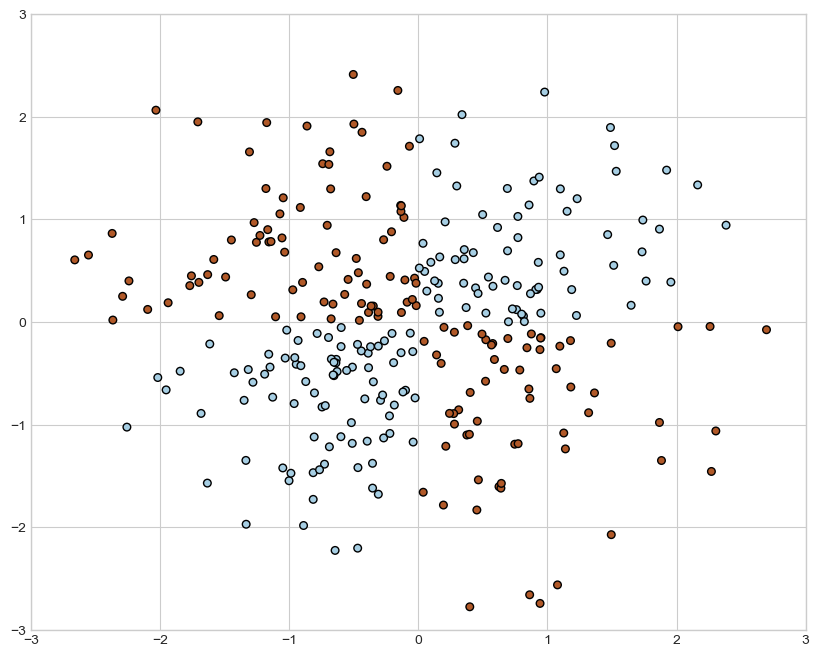

In [3]:
np.random.seed(0)
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0) * 1

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired, edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

Now, let's fit an SVM model with linear kernel on this dataset.

In [4]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")
svm_model.fit(train_X, train_Y)

SVC(kernel='linear')

In [5]:
plt.style.use('default') 

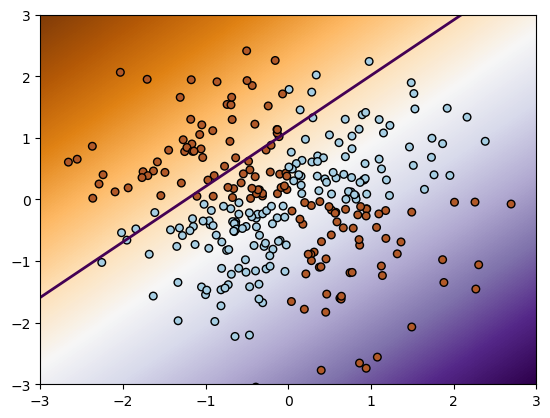

In [6]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    """
    Plots the decision function for each datapoint on the grid
    """
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
                   aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
                  aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors='k')
        ax.axis([-3, 3, -3, 3])

plot_svm(svm_model, train_X, train_Y)

In [7]:
accuracy = accuracy_score(train_Y, svm_model.predict(train_X))
print(f"""Accuracy : {accuracy * 100} %""")

Accuracy : 68.0 %


It was obvious that a linear decision boundary won't be able to separate these 2 classes. Now, let's try SVM with polynomial kernel of degree 2 and 3.

Degree = 2, 
Accuracy : 93.33333333333333 %


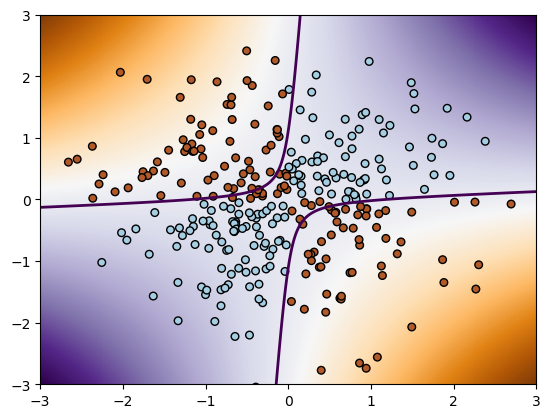

In [8]:
svm_model = SVC(kernel="poly", degree=2)
svm_model.fit(train_X, train_Y)   
accuracy = accuracy_score(train_Y, svm_model.predict(train_X))
print(f"""Degree = {2}, 
Accuracy : {accuracy * 100} %""")
plot_svm(svm_model, train_X, train_Y)

Degree = 3, 
Accuracy : 55.333333333333336 %


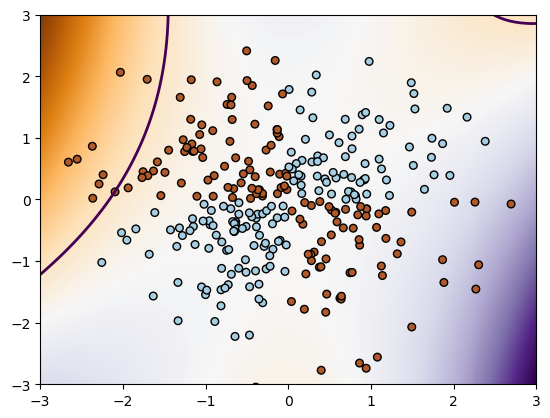

In [9]:
svm_model = SVC(kernel="poly", degree=3)
svm_model.fit(train_X, train_Y)
accuracy = accuracy_score(train_Y, svm_model.predict(train_X))
print(f"""Degree = {3}, 
Accuracy : {accuracy * 100} %""")
plot_svm(svm_model, train_X, train_Y)

The polynomial kernel of degree 2 outperforms the one with degree 3. Now, let's see what is the reason behind this.

Which of the following features is the most useful in discriminating the 2 classes:  $x_1 ,  x_2 ,  x_1^2 ,  x_2^2 ,  x_1^3 ,  x_2^3 ,  x_1x_2 ,  x_1^2x_2 ,  x_2^2x_1$ ?

The visualizations below can give an idea about the suitable features. Note that the lighter colors represent hills (higher values) and darker colors are valleys (lower values).

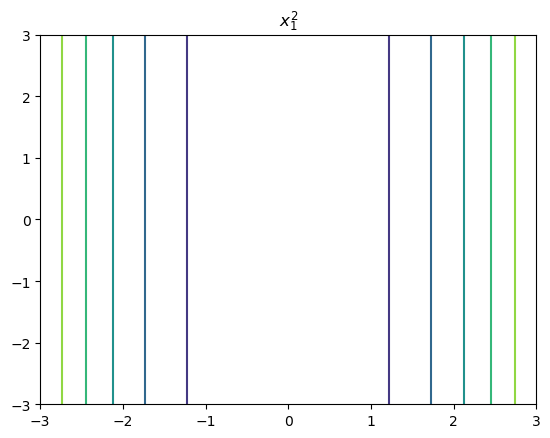

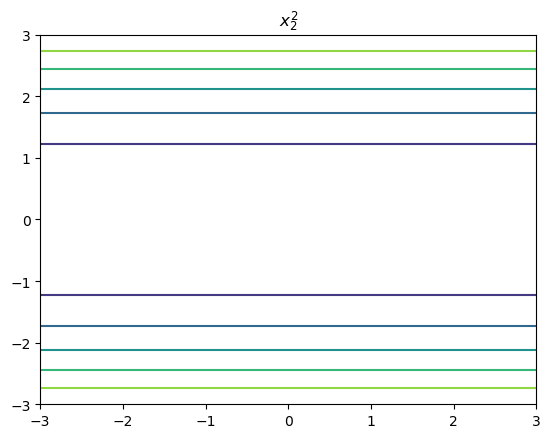

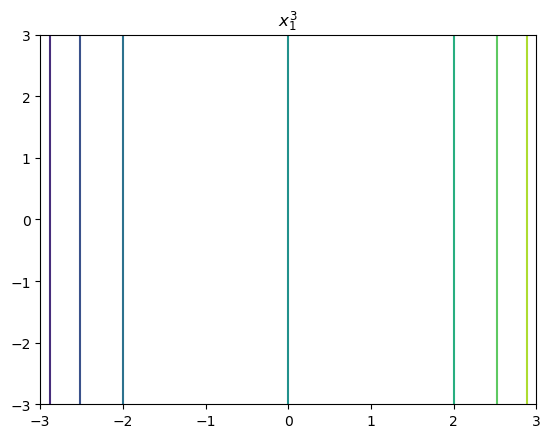

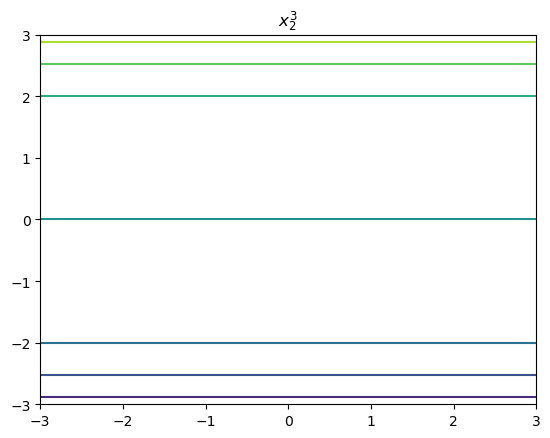

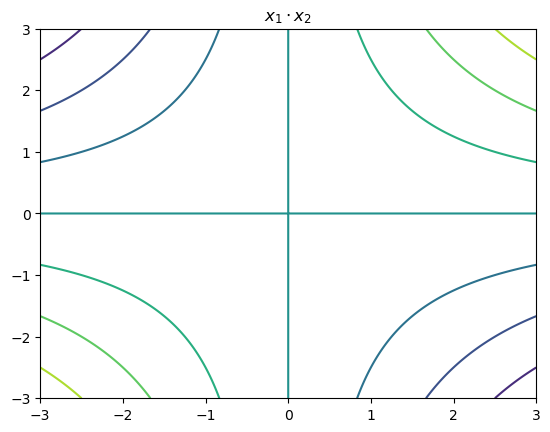

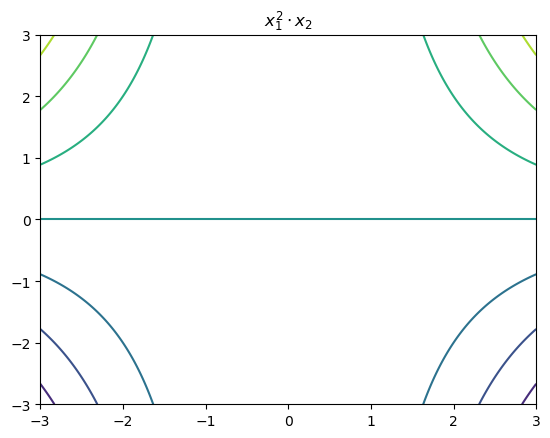

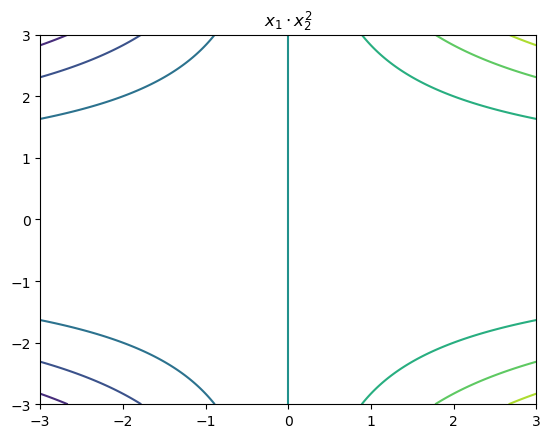

In [10]:
plt.style.use('default') 

plt.contour(xx, yy, xx*xx)
plt.title('$x_1^2$')
plt.show()

plt.contour(xx, yy, yy*yy)
plt.title('$x_2^2$')
plt.show()

plt.contour(xx, yy, xx**3)
plt.title('$x_1^3$')
plt.show()

plt.contour(xx, yy, yy**3)
plt.title('$x_2^3$')
plt.show()

plt.contour(xx, yy, xx*yy)
plt.title('$x_1 \cdot x_2$')
plt.show()

plt.contour(xx, yy, xx*xx*yy)
plt.title('$x_1^2\cdot x_2$')
plt.show()

plt.contour(xx, yy, yy*yy*xx)
plt.title('$x_1 \cdot x_2^2$')
plt.show()

$x_1\cdot x_2$ is the most needed to discriminate between the classes. Now, let's expand (open the brackets of) the 2nd degree polynomial kernel expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2=(x_1z_1+x_2z_2)^2,$ where $\mathbf{x}=(x_1, x_2)$ and $\mathbf{z}=(z_1, z_2)$.

In [11]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
print(sp.expand((x1*z1 + x2*z2)**2))

x_1**2*z_1**2 + 2*x_1*x_2*z_1*z_2 + x_2**2*z_2**2


The feature space $\phi(\mathbf{x})$ is constructed from $\phi(\mathbf{x})=(x_1^2, \sqrt2 x_1 \cdot x_2, x_2^2)$ features, because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

The best discriminator feature is among the constructed feature space as $\sqrt{2}x_1\cdot x_2$.

Now, let's look at the feature space constructed with the 3rd degree polynomial kernel $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3=(x_1z_1+x_2z_2)^3$.

In [12]:
x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
print(sp.expand((x1*z1 + x2*z2)**3))

x_1**3*z_1**3 + 3*x_1**2*x_2*z_1**2*z_2 + 3*x_1*x_2**2*z_1*z_2**2 + x_2**3*z_2**3


The corresponding transformation is: $\phi(\boldsymbol{x})=(x_1^3, \sqrt3 x_1^2 \cdot x_2, \sqrt3 x_1 \cdot x_2^2, x_2^3 )$, and the best discriminator is not present among the features.

Remember that the polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d=(x_1z_1+x_2z_2 + r)^d$, but by default this $r$ is 0 (in sklearn's implementation). 

Let's take $r = 1$, $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. 

In [13]:
x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
print(sp.expand((x1*z1 + x2*z2 + 1)**3))

x_1**3*z_1**3 + 3*x_1**2*x_2*z_1**2*z_2 + 3*x_1**2*z_1**2 + 3*x_1*x_2**2*z_1*z_2**2 + 6*x_1*x_2*z_1*z_2 + 3*x_1*z_1 + x_2**3*z_2**3 + 3*x_2**2*z_2**2 + 3*x_2*z_2 + 1


The transformation from the original feature space will be: $\phi(\boldsymbol{x})=(x_1^3, \sqrt3 x_1^2 \cdot x_2, \sqrt3 x_1^2, \sqrt x_1 \cdot x_2^2, \sqrt6 x_1 \cdot x_2, \sqrt3 x_1 \cdot x_2^2, \sqrt3 x_2^2,\sqrt3 x_2 , 1 )$, and the best discriminant feature is among the constructed features as $\sqrt{6}x_1\cdot x_2$.

Now, let's try fitting the model with this kernel. 

Degree = 3, 
Accuracy : 96.33333333333334 %


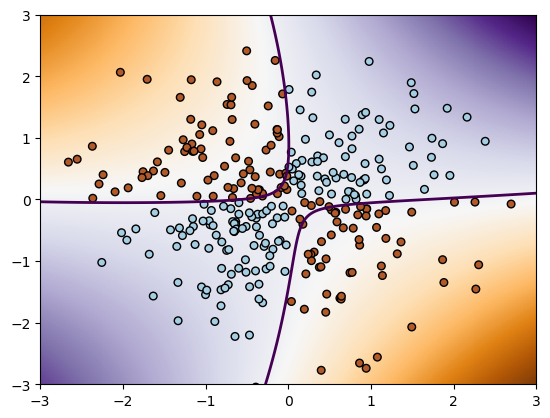

In [14]:
svm_model = SVC(kernel="poly", degree=3, coef0=1)
svm_model.fit(train_X, train_Y)
accuracy = accuracy_score(train_Y,svm_model.predict(train_X))
print(f"""Degree = {3}, 
Accuracy : {accuracy * 100} %""")
plot_svm(svm_model, train_X, train_Y)